# **Project 2: Impact of Population on Baby Names in the United States**
#### For Project 2, I will continue to examine trends in baby names in the United States. This time, I will use US Census Bureau data to answer the question: **How does accounting for population change the impact of the most popular names I discovered from Project 1?** Each year, the Social Security Administration releases baby names on a state and national level. I am interested in exploring trends in names that have been around since the early 20th century, as well as names that are gaining traction from popular culture. 

#### Data Sources: 
- https://www.ssa.gov/oact/babynames/limits.html
- https://www.kaggle.com/kaggle/us-baby-names
- https://www2.census.gov/programs-surveys/popest/tables/1900-1980/national/totals/popclockest.txt
- https://www.census.gov/data/tables/time-series/demo/popest/pre-1980-national.html

#### *Note* that only names with at least 5 babies born in the same year (/ state) are included in this dataset for privacy. For the population data, the values from 1900-1999 are historic national population estimates. National population data for the years 1900 to 1929 are only available rounded to the nearest thousand.

## **Getting to know the Data**

In [ ]:
# Code for downloading notebook specific packages:
# pip install wordcloud
# pip install bokeh

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Bokeh libraries
import pandas_bokeh
from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel
from bokeh.models import HoverTool
from bokeh.models.ranges import Range1d
from bokeh.models.glyphs import Line as Line_glyph

In [3]:
# WordCloud libraries
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
# Load national level baby name data from Google Drive file
import requests 
from io import StringIO
#This is the Google Drive URL
orig_url = "https://drive.google.com/file/d/1JEagyXfLOXGkOHpB9O7oG07Lhlfbj8n7/view?usp=sharing"
# Remove all the directory information and only extract the alpha numerical file identifier of the code
file_id = orig_url.split('/')[-2]
# Add the "export syntax to the alpha numierical file_id
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
# Turn object into a raw string
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
# Use panda to load the raw csv string
dfnational = pd.read_csv(csv_raw)

In [5]:
# Load US population data from Github
dfpop=pd.read_csv("https://raw.githubusercontent.com/meganross17/Baby-Name-Project/main/PopulationData.csv", skipinitialspace = True, error_bad_lines=False)

In [6]:
# Dataset and variable information, what types of variables are we working with?
dfnational.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   Count   int64 
dtypes: int64(3), object(2)
memory usage: 69.6+ MB


In [7]:
dfpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        115 non-null    int64
 1   Population  115 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [8]:
# How many rows and columns?
print("National level data: How many rows, columns:", dfnational.shape)
print("Population data: How many rows, columns:", dfpop.shape)

National level data: How many rows, columns: (1825433, 5)
Population data: How many rows, columns: (115, 2)


In [9]:
# Take a look at the dataset, random sampling of 5 data entries
dfnational.sample(10)

,Id,Name,Year,Gender,Count
173370,173371,Slyvia,1920,F,8
1318616,1318617,Asheli,1999,F,5
871269,871270,Cherina,1980,F,8
877744,877745,Antwuan,1980,M,30
1146970,1146971,Ryanne,1993,F,57
1139808,1139809,Damain,1992,M,11
662464,662465,Tora,1967,F,9
1112518,1112519,Rayford,1991,M,23
1667656,1667657,Jood,2010,F,11
1662023,1662024,Janey,2010,F,33


In [11]:
dfpop.sample(10)

,Year,Population
9,2005,295516600
15,1999,272690813
71,1943,136739353
68,1946,141388566
23,1991,252153092
63,1951,154877889
12,2002,287625200
97,1917,103268000
92,1922,110049000
45,1969,202676946


In [12]:
# Max year we have data for
maxyear=dfnational["Year"].max()
print("The most recent year included in the baby name dataset is:",maxyear)
maxyear2=dfpop["Year"].max()
print("The most recent year included in the population dataset is:",maxyear2)

The most recent year included in the baby name dataset is: 2014
The most recent year included in the population dataset is: 2014


In [13]:
# Max year we have data for
minyear=dfnational["Year"].min()
print("The oldest year included in the baby name dataset is:",minyear)
minyear2=dfpop["Year"].min()
print("The oldest year included in the population dataset is:",minyear2)

The oldest year included in the baby name dataset is: 1880
The oldest year included in the population dataset is: 1900


## **Data Cleaning and Merge Files**

In [14]:
# Make sure the objects are strings
dfnational.Name = dfnational.Name.astype(str)
dfnational.Gender = dfnational.Gender.astype(str)
dfnational.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   Count   int64 
dtypes: int64(3), object(2)
memory usage: 69.6+ MB


In [15]:
# Now we can merge the 2 workbooks
df= dfpop.merge(dfnational, on='Year')
df=df.drop(["Id"], axis=1)
# View what the merged data looks like
df.sample(5)

,Year,Population,Name,Gender,Count
1302386,1955,165931202,Shereen,F,14
810741,1987,242288918,Sheldon,F,8
103943,2011,311580000,Enya,F,37
432546,2002,287625200,Sameul,M,5
1028679,1976,218035164,Brain,M,154


In [16]:
# Check to make sure the merge worked as expected (ex: all the 2014 population values should be the same)
df.head(10)

,Year,Population,Name,Gender,Count
0,2014,318386400,Emma,F,20799
1,2014,318386400,Olivia,F,19674
2,2014,318386400,Sophia,F,18490
3,2014,318386400,Isabella,F,16950
4,2014,318386400,Ava,F,15586
5,2014,318386400,Mia,F,13442
6,2014,318386400,Emily,F,12562
7,2014,318386400,Abigail,F,11985
8,2014,318386400,Madison,F,10247
9,2014,318386400,Charlotte,F,10048


In [22]:
# Add a column that is the percent of population for a given name that year
df['PercentPop'] = (df['Count'] / df['Population'])*100
df.sample(5)

,Year,Population,Name,Gender,Count,PercentPop
1220596,1962,186537737,Lenetta,F,12,0.000006
1756295,1904,82166000,Lucinda,F,101,0.000123
1676776,1917,103268000,Pauline,F,6896,0.006678
329698,2005,295516600,Caius,M,23,0.000008
511832,1999,272690813,Humza,M,48,0.000018


## **Data Exploration**
### What can the data show us? This step is necessary in order to determine how to best visualize the data later. First, we look at popularity by **Count**.

In [17]:
# The below table shows the 10 highest frequency (count) names on a national level, without taking population into account
top10=df.nlargest(10,"Count")
print("Overall highest frequency names in a given year by count:")
top10

Overall highest frequency names in a given year by count:


,Year,Population,Name,Gender,Count
1384009,1947,144126071,Linda,F,99680
1373774,1948,146631302,Linda,F,96205
1390114,1947,144126071,James,M,94755
1283291,1957,171984130,Michael,M,92709
1390115,1947,144126071,Robert,M,91642
1363512,1949,149188130,Linda,F,91010
1294733,1956,168903031,Michael,M,90633
1271783,1958,174881904,Michael,M,90519
1379811,1948,146631302,James,M,88596
1316906,1954,163025854,Michael,M,88485


In [18]:
# Now I want to look at the highest frequency (count) girl names
dffemale=df[df["Gender"]=="F"]
top10female=dffemale.nlargest(10,"Count")
print("Overall highest frequency female names in a given year by count:")
top10female

Overall highest frequency female names in a given year by count:


,Year,Population,Name,Gender,Count
1384009,1947,144126071,Linda,F,99680
1373774,1948,146631302,Linda,F,96205
1363512,1949,149188130,Linda,F,91010
1353205,1950,152271417,Linda,F,80431
1634362,1921,108538000,Mary,F,73985
1342745,1951,154877889,Linda,F,73933
1602095,1924,114109000,Mary,F,73527
1623605,1922,110049000,Mary,F,72171
1384010,1947,144126071,Mary,F,71684
1612962,1923,111947000,Mary,F,71634


In [19]:
# What were the highest frequency names (by count) in the most recent year we have data for?
df2014=df[df["Year"]==maxyear]
top102014=df2014.nlargest(10,"Count")
print("The most popular names in 2014 are by count:")
top102014

The most popular names in 2014 are by count:


,Year,Population,Name,Gender,Count
0,2014,318386400,Emma,F,20799
1,2014,318386400,Olivia,F,19674
19067,2014,318386400,Noah,M,19144
2,2014,318386400,Sophia,F,18490
19068,2014,318386400,Liam,M,18342
19069,2014,318386400,Mason,M,17092
3,2014,318386400,Isabella,F,16950
19070,2014,318386400,Jacob,M,16712
19071,2014,318386400,William,M,16687
19072,2014,318386400,Ethan,M,15619


In [20]:
# And the oldest year we have data for?
df1900=df[df["Year"]==minyear2]
top101900=df1900.nlargest(10,"Count")
print("The most popular names in 1900 by count are:")
top101900

The most popular names in 1900 by count are:


,Year,Population,Name,Gender,Count
1769437,1900,76094000,Mary,F,16707
1771662,1900,76094000,John,M,9829
1771663,1900,76094000,William,M,8578
1771664,1900,76094000,James,M,7245
1769438,1900,76094000,Helen,F,6343
1769439,1900,76094000,Anna,F,6114
1771665,1900,76094000,George,M,5403
1769440,1900,76094000,Margaret,F,5306
1769441,1900,76094000,Ruth,F,4765
1771666,1900,76094000,Charles,M,4101


### Now I want to take a look at the most popular names in history. Both by **count** and also by **percentage of population**. The goal of this project is to examine similarities and differences between popularity by count and by percent of population. 

In [23]:
# What are the most popular names by percent of total population for the given year?
top15=df.nlargest(15,"PercentPop")
print("Most popular names by percent of population:")
top15

Most popular names by percent of population:


,Year,Population,Name,Gender,Count,PercentPop
1384009,1947,144126071,Linda,F,99680,0.069162
1634362,1921,108538000,Mary,F,73985,0.068165
1645218,1920,106461000,Mary,F,70976,0.066669
1390114,1947,144126071,James,M,94755,0.065745
1373774,1948,146631302,Linda,F,96205,0.065610
1623605,1922,110049000,Mary,F,72171,0.065581
1666344,1918,103208000,Mary,F,67370,0.065276
1602095,1924,114109000,Mary,F,73527,0.064436
1612962,1923,111947000,Mary,F,71634,0.063989
1390115,1947,144126071,Robert,M,91642,0.063585


#### **Note:** The above table is similar, but not identical to the table looking at highest count of a given year

In [24]:
# To view popularity on an aggregate level by the percentage of population, I will get rid of the year column, and take an average of percent pop by name. 
cumulative_percentpop=df.drop(["Year"], axis=1)
# Combine data by name and sum up the count column
cumulative_percentpop=cumulative_percentpop.groupby(["Name"],as_index=False).agg({"PercentPop": "mean"})
print("Most popular names by average yearly percent of population:")
cumulative_percentpop.nlargest(15,"PercentPop")

Most popular names by average yearly percent of population:


,Name,PercentPop
41454,John,0.014010
37238,James,0.013971
72301,Robert,0.013460
58845,Mary,0.012991
89995,William,0.011145
60857,Michael,0.009921
20636,David,0.008752
71846,Richard,0.007228
15522,Charles,0.006712
42153,Joseph,0.006538


In [25]:
# To view most popular by count, I will get rid of the year column, and sum up the total counts by name. 
dfdrop=df.drop(["Year"], axis=1)
# Combine data by Name and sum up the count column
total=dfdrop.groupby(["Name"],as_index=False).agg({"Count": "sum"})
print("The 15 most popular names by count in the US from 1900-2014 are:")
total.nlargest(15,"Count")

The 15 most popular names by count in the US from 1900-2014 are:


,Name,Count
37238,James,5023766
41454,John,4934999
72301,Robert,4766270
60857,Michael,4323312
89995,William,3913503
58845,Mary,3906779
20636,David,3575605
71846,Richard,2550211
42153,Joseph,2525095
15522,Charles,2292736


#### **Note:** These two tables are very similar, but you can see while James is the most popular name in history by total count/occurances, John is more popular as an average percent of the population. 

## **Data Visualization**
#### In this section I will use WordCloud and Bokeh to better visualize the dataset. 
### **Creating WordClouds:**
#### I want to visualize the difference between the most popular names by count and the most popular names by percent of population. The below 2 word clouds will show the 50 most popular names by count and then by percent of the population.
- Learned how to incorporate WordClouds using examples from: https://www.datacamp.com/community/tutorials/wordcloud-python

#### If we do this just by count without aggregating, only 6 names would show up because 6 names make up the top 50 most popular by count in a year. To avoid this, the first WordCloud will use the **aggregated** dataframe created above where we dropped year and summed up total counts. 

In [26]:
# Dataframe for WordCloud
top50=total.nlargest(50,"Count")

The 50 Most Popular Names by count in the United States from 1900-2014


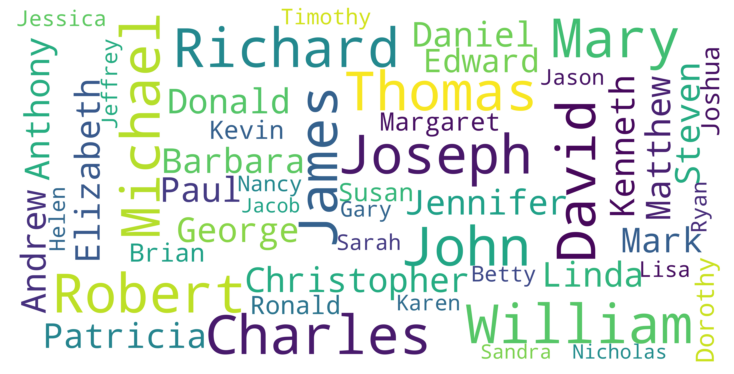

In [27]:
# Select text for WordCloud
text = top50["Name"]
exclude = ["type", "dtype","Name","object"]
stopwords = STOPWORDS.update(exclude)    # STOPWORDS is a of type Set     

wc = WordCloud(scale = 15,
  max_font_size=30,
    background_color = 'white',
    stopwords = stopwords)

wc.generate(str(text))

#S how figure
fig = plt.figure(figsize = (10,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
print("The 50 Most Popular Names by count in the United States from 1900-2014")
plt.show()

#### In the data exploration above, we discovered that while there were slight differences between the tables for most popular by count and by percent of the population, the aggregated top 50 names were *consistent* across both lists. So, it does not make sense to plot the same word cloud as above using percent of pop because the results/visualization would be very similar. What would be interesting is creating a visual of the top 50 names by percent of pop *for a given year*. Even when we take the top 50, we are only returned with 6 names that have consistently been the most popular as a percent of the population. 

In [28]:
# Dataframe for WordCloud
top50percent=df.nlargest(50,"PercentPop")

The 50 Most Popular Names by Percent of Population (without aggregating by year) in the United States from 1900-2014


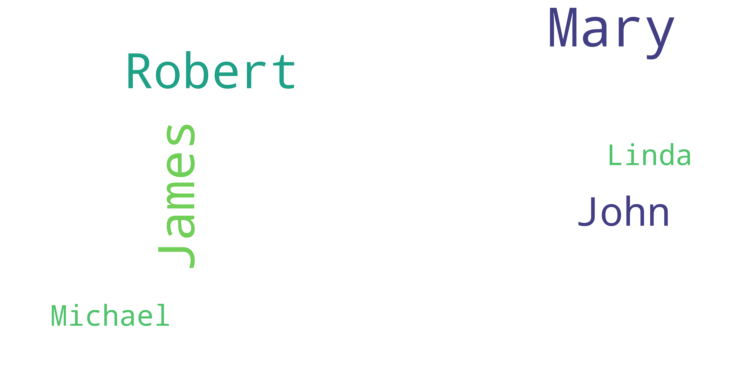

In [29]:
# Select text for WordCloud
text = top50percent["Name"]
exclude = ["type", "dtype","Name","object"]
stopwords = STOPWORDS.update(exclude)    # STOPWORDS is a of type Set     

wc = WordCloud(scale = 15,
  max_font_size=30,
    background_color = 'white',
    stopwords = stopwords)

wc.generate(str(text))

# Show figure
fig = plt.figure(figsize = (10,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
print("The 50 Most Popular Names by Percent of Population (without aggregating by year) in the United States from 1900-2014")
plt.show()

#### You could also use the WordCloud to visualize a range of years or one specific year. This next WordCloud is a visualization of popularity in recent years.

In [30]:
# Create a dataframe for top names since 2010
recent=dfnational[dfnational["Year"]>=2010]
# Then drop the year and merge by name
dfdrop2=recent.drop(["Year"], axis=1)
# Combine data by Name and sum up the count column
total2=dfdrop2.groupby(["Name"],as_index=False).agg({"Count": "sum"})
recenttop50=total2.nlargest(50,"Count")

The 50 Most Popular Names in the United States since 2010


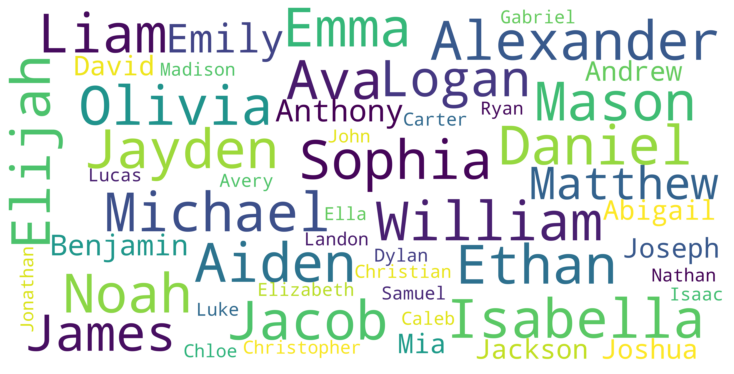

In [31]:
# Select text for WordCloud
text2 = recenttop50["Name"]
exclude2 = ["type", "dtype","Name","object"]
stopwords2 = STOPWORDS.update(exclude2)    # STOPWORDS is a of type Set     

wc2 = WordCloud(scale = 15,
  max_font_size=30,
    background_color = 'white',
    stopwords = stopwords2)

wc2.generate(str(text2))

#Show figure
fig = plt.figure(figsize = (10,6))
plt.imshow(wc2, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
print("The 50 Most Popular Names in the United States since 2010")
plt.show()

### **Creating a Histogram using Bokeh:**
#### Next, I will look at popularity by count of 1 specific name over time using an interactive histogram. The user will be able to select a Name and Gender they want to see plotted. 

- Learned about how to use Bokeh for interactive visualization from: https://realpython.com/python-data-visualization-bokeh/
- https://towardsdatascience.com/beautiful-and-easy-plotting-in-python-pandas-bokeh-afa92d792167

In [32]:
# Ask the user what name and gender we want to examine
inputname=input("What name would you like to view?")
inputgender=input("What gender would you like to view? M of F?")
dfname=dfnational[dfnational["Name"]==inputname]
dfname1=dfname[dfname["Gender"]==inputgender]

What name would you like to view? John
What gender would you like to view? M of F? M


In [33]:
# Bokeh plot:
# User tools
select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'reset']

# Create and configure the figure
fig = figure(plot_height=700,
             plot_width=1300,
             x_axis_label="Year",
             y_axis_label="Count of Name per Year",
             title="Trends in the name " +inputname+ " over time",
             toolbar_location='below',
             tools=select_tools)

# Bar information and variables
fig.vbar(x="Year", top="Count", source=dfname1, width=0.70)

# Below is what will pop up when a user hovers over a data point
tooltips = [("Year", "@Year"),("Count", "@Count"),]

# Add the HoverTool to the figure
fig.add_tools(HoverTool(tooltips=tooltips))

# Show the plot
show(fig)

#### Lastly, I want to try and visualize the following scenario: Does the change in count and the change in percent of population always move in the same direction? For example, the total number of new babies named Bob increased by 10,000 from the previous year, but decreased relative to the percent of the population.

In [34]:
# Ask the user what name and gender we want to examine
inputname2=input("What name would you like to view?")
inputgender2=input("What gender would you like to view? M of F?")
dfname2=df[df["Name"]==inputname2]
dfname3=dfname2[dfname2["Gender"]==inputgender2]

What name would you like to view? John
What gender would you like to view? M of F? M


In [35]:
dfname3.head(10)

,Year,Population,Name,Gender,Count,PercentPop
19092,2014,318386400,John,M,10600,0.003329
52261,2013,316057700,John,M,10670,0.003376
85742,2012,313874200,John,M,10593,0.003375
119497,2011,311580000,John,M,11020,0.003537
153625,2010,309326100,John,M,11539,0.003730
188032,2009,306771500,John,M,12100,0.003944
222983,2008,304094000,John,M,13307,0.004376
258136,2007,301231200,John,M,14423,0.004788
292562,2006,298379900,John,M,15153,0.005078
325762,2005,295516600,John,M,15758,0.005332


#### I waited until after I filtered by name to calculate the % change because Pandas dataframe.pct_change() function calculates the % change between the **current and a prior element**. This function by default calculates the percentage change from the **immediately previous row**.

In [36]:
# Add a column that is the percent change of count year over year for that given name
dfname3['PercentChangeCount'] = dfname3["Count"].pct_change() 

C:\Users\mross\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
# Add a column that is the percent change of count year over year for that given name
dfname3['PercentChangePercentPop'] = dfname3["PercentPop"].pct_change() 
dfname3.head(10)

C:\Users\mross\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,Population,Name,Gender,Count,PercentPop,PercentChangeCount,PercentChangePercentPop
19092,2014,318386400,John,M,10600,0.003329,NaN,NaN
52261,2013,316057700,John,M,10670,0.003376,0.006604,0.014020
85742,2012,313874200,John,M,10593,0.003375,-0.007216,-0.000310
119497,2011,311580000,John,M,11020,0.003537,0.040310,0.047970
153625,2010,309326100,John,M,11539,0.003730,0.047096,0.054726
188032,2009,306771500,John,M,12100,0.003944,0.048618,0.057350
222983,2008,304094000,John,M,13307,0.004376,0.099752,0.109435
258136,2007,301231200,John,M,14423,0.004788,0.083866,0.094166
292562,2006,298379900,John,M,15153,0.005078,0.050614,0.060653
325762,2005,295516600,John,M,15758,0.005332,0.039926,0.050002


In [41]:
# Graph both of them on the same chart
dfname3.plot_bokeh.line(
    x='Year', 
    y=['PercentChangePercentPop','PercentChangeCount'],
    figsize=(3000, 600),
    #ylim=(5000, 20000),
    zooming=False,
    panning=False
)

Figure(id='1345', ...)

#### **Project 2 Question: How does accounting for population change the impact of the most popular names I discovered from Project 1?**

#### **Conclusion:** Even when population is accounted for, the % change by count and % change by population typically trend in the same direction. The top names are not in the exact same order, they are very similar when comparing count to a percent of the population. 